In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/sample_data/diabetes_feature.csv")
df.shape

(768, 16)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [ ]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
     'Insulin_nan','low_glu_insulin']]

X.shape

(768, 9)

In [ ]:
y = df['Outcome']
y.shape

(768,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2)

In [ ]:
X_train.shape, y_train.shape

((614, 9), (614,))

In [ ]:
X_test.shape, y_test.shape

((154, 9), (154,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 5)
model

DecisionTreeClassifier(max_depth=5)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [ ]:
abs(y_predict - y_test).sum()

24

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441

In [ ]:
feature_names = X_train.columns.tolist()

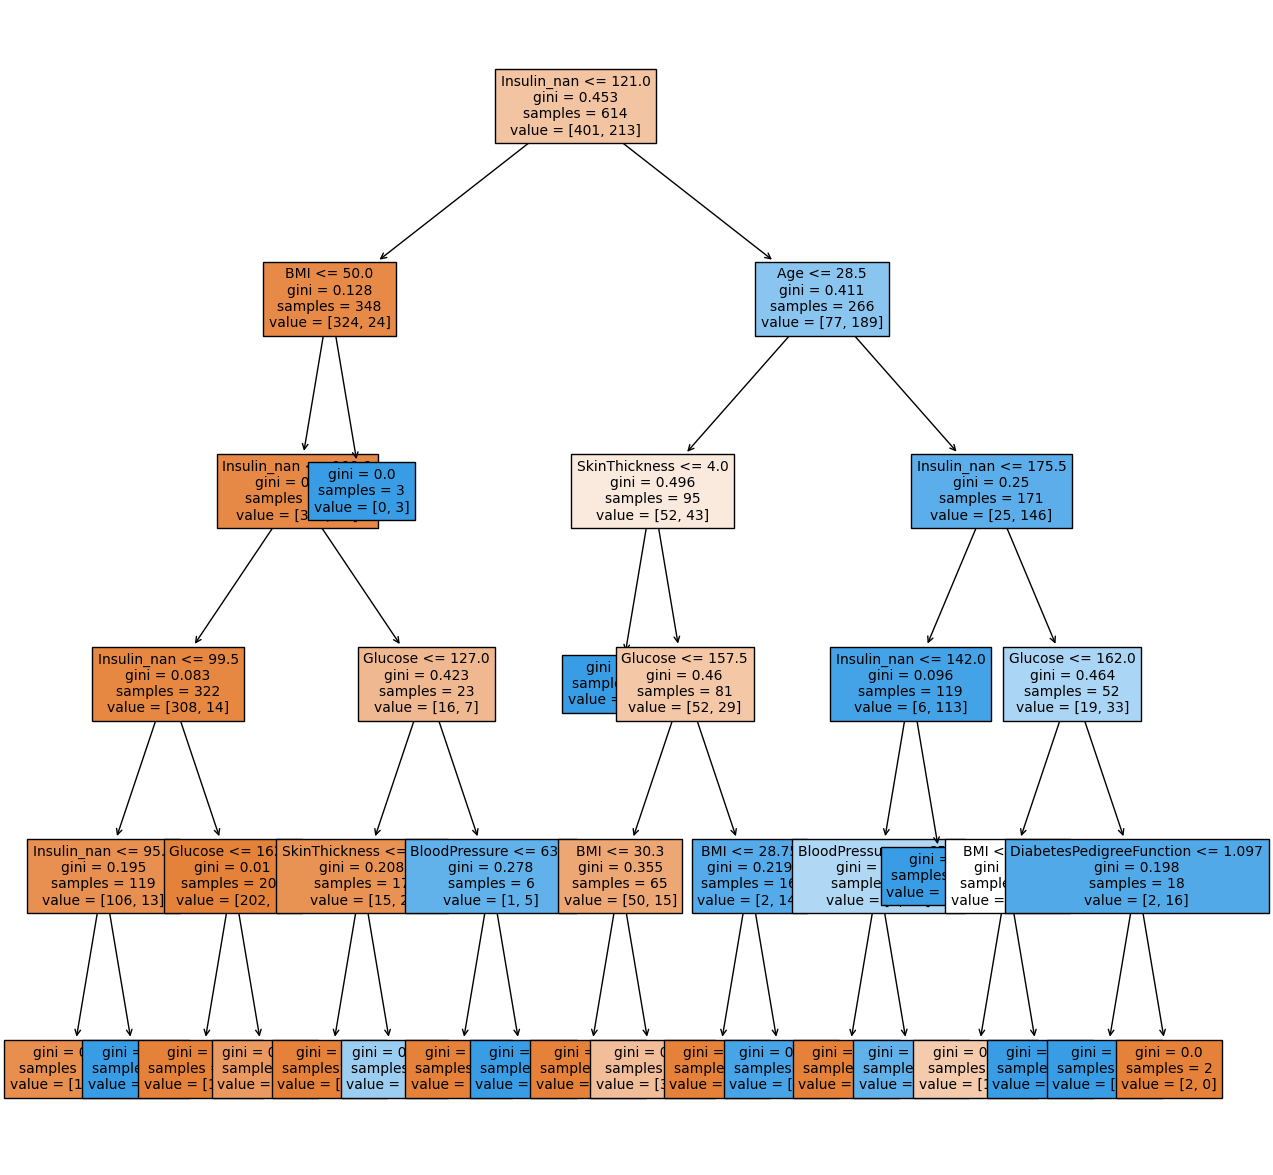

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names = feature_names,fontsize=10, filled = True)

In [ ]:
for max_depth in range(3, 12):
  model = DecisionTreeClassifier(max_depth=max_depth, random_state = 42)
  y_predict = model.fit(X_train, y_train).predict(X_test)
  score = accuracy_score(y_test, y_predict)*100
  print(max_depth, score)

3 87.01298701298701
4 83.76623376623377
5 84.4155844155844
6 83.76623376623377
7 82.46753246753246
8 81.16883116883116
9 83.11688311688312
10 80.51948051948052
11 81.16883116883116


In [ ]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state = 42)
param_grid = {"max_depth": range(3, 12), "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid = param_grid, n_jobs = -1, cv = 5, verbose = 1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [ ]:
clf.best_params_

{'max_depth': 7, 'max_features': 0.7}

In [ ]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=0.7, random_state=42)

In [ ]:
clf.best_score_

0.8664667466346796

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.017895,0.005664,0.010233,0.003967,7,0.7,"{'max_depth': 7, 'max_features': 0.7}",0.837398,0.886179,0.845528,0.886179,0.877049,0.866467,0.020845,1
12,0.015932,0.004316,0.015570,0.001280,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.796748,0.878049,0.845528,0.894309,0.901639,0.863255,0.038455,2
21,0.020990,0.005358,0.016306,0.007925,7,0.5,"{'max_depth': 7, 'max_features': 0.5}",0.813008,0.869919,0.861789,0.845528,0.901639,0.858377,0.029120,3
17,0.016354,0.005377,0.015983,0.006437,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.804878,0.910569,0.837398,0.878049,0.860656,0.858310,0.035828,4
33,0.018390,0.003899,0.012080,0.005831,9,0.9,"{'max_depth': 9, 'max_features': 0.9}",0.829268,0.886179,0.804878,0.845528,0.901639,0.853499,0.035777,5
38,0.014404,0.001824,0.005570,0.002685,10,0.9,"{'max_depth': 10, 'max_features': 0.9}",0.829268,0.886179,0.804878,0.853659,0.893443,0.853485,0.033510,6
43,0.015218,0.002958,0.005023,0.002845,11,0.9,"{'max_depth': 11, 'max_features': 0.9}",0.829268,0.869919,0.804878,0.853659,0.893443,0.850233,0.030864,7
2,0.015926,0.003652,0.007635,0.002057,3,0.7,"{'max_depth': 3, 'max_features': 0.7}",0.845528,0.861789,0.853659,0.837398,0.852459,0.850167,0.008210,8
13,0.024921,0.006303,0.012051,0.002354,5,0.9,"{'max_depth': 5, 'max_features': 0.9}",0.788618,0.869919,0.829268,0.853659,0.901639,0.848621,0.038118,9
7,0.025991,0.004530,0.019076,0.003849,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.829268,0.869919,0.837398,0.853659,0.852459,0.848541,0.014101,10


In [ ]:
clf.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [ ]:
clf.score(X_test, y_test)

0.8636363636363636

In [ ]:
model

DecisionTreeClassifier(random_state=42)

In [ ]:
max_depth = np.random.randint(3, 20, 10)

In [ ]:
max_features = np.random.uniform(0.5, 1.0, 100)

In [ ]:
param_distribution = {"max_depth": max_depth,
                      "max_features": max_features,
                      "min_samples_split": list(range(2, 7))}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

RandomizedSearchCV(model,
                  param_distribution,
                  n_iter = 100,
                  scoring = "accuracy",
                  n_jobs = -1,
                  cv = 5,
                  random_state = 42
                  )
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [ ]:
clf.best_params_

{'max_depth': 7, 'max_features': 0.7}

In [ ]:
clf.best_score_

0.8664667466346796

In [ ]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
22,0.014453,0.004546,0.006252,0.003567,7,0.7,"{'max_depth': 7, 'max_features': 0.7}",0.837398,0.886179,0.845528,0.886179,0.877049,0.866467,0.020845,1
12,0.005317,0.000047,0.003120,0.000194,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.796748,0.878049,0.845528,0.894309,0.901639,0.863255,0.038455,2
21,0.007438,0.003837,0.008804,0.008087,7,0.5,"{'max_depth': 7, 'max_features': 0.5}",0.813008,0.869919,0.861789,0.845528,0.901639,0.858377,0.029120,3
17,0.014404,0.005389,0.011782,0.010540,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.804878,0.910569,0.837398,0.878049,0.860656,0.858310,0.035828,4
33,0.016537,0.002977,0.010253,0.006064,9,0.9,"{'max_depth': 9, 'max_features': 0.9}",0.829268,0.886179,0.804878,0.845528,0.901639,0.853499,0.035777,5


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model

DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
(y_predict != y_test).sum()

32

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7922077922077922

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42)

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
model.feature_importances_

array([0.15253047, 0.04591742, 0.07048599, 0.09821081, 0.06700928,
       0.08696438, 0.01706027, 0.43067087, 0.0311505 ])

In [ ]:
feature_names = X_train.columns.tolist()

<Axes: >

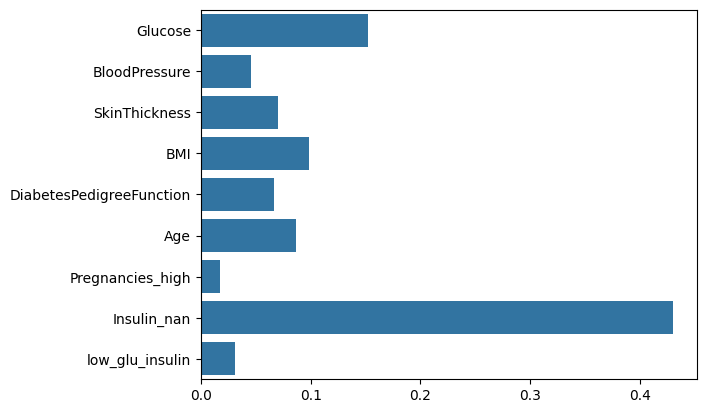

In [ ]:
sns.barplot(x=model.feature_importances_, y= feature_names )

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
(y_predict != y_test).sum()

16

#그라디언트 부스팅

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model

GradientBoostingClassifier()

In [ ]:
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
feature_names = model.feature_importances_

In [ ]:
feature_names = X_train.columns.tolist()

<Axes: >

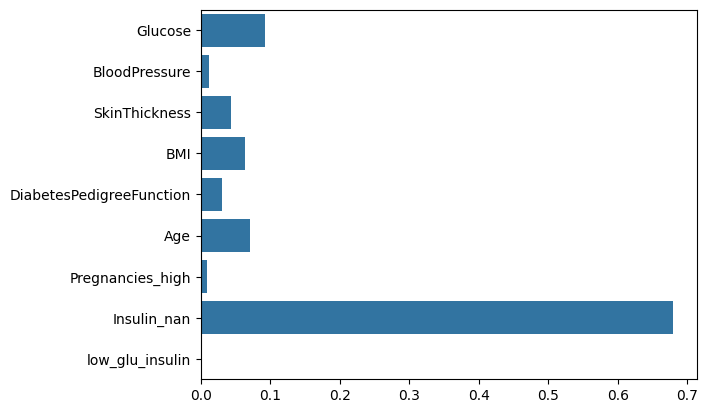

In [ ]:
sns.barplot(x = model.feature_importances_, y= feature_names )

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
(y_predict != y_test).sum()

20

#여러개의 알고리즘을 사용해서 비교하기(한번에)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimator = [DecisionTreeClassifier(random_state=42),
             RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)]
estimator

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [ ]:
max_depth = np.random.randint(2, 20, 10)
max_depth

array([15, 14,  8,  7, 14,  8, 17, 12,  3, 13])

In [ ]:
max_features = np.random.uniform(0.3, 1.0, 10)
max_features

array([0.81795241, 0.37118182, 0.46935078, 0.55610267, 0.62091264,
       0.51439466, 0.7451487 , 0.77145464, 0.9339611 , 0.47301013])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": max_depth,
                       "max_features": max_features
                       }
clf = RandomizedSearchCV(estimator,
                   param_distributions,
                   n_iter=10,
                   scoring = "accuracy",
                   n_jobs = -1,
                   cv = 5,
                   verbose = 2
                   )
clf.fit(X_train, y_train)

TypeError: estimator should be an estimator implementing 'fit' method, [DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42)] was passed

In [ ]:
clf.best_params_

#RandomSearchCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
RandomForestClassifier(random_state=42),
GradientBoostingClassifier(random_state=42)
]
estimators

In [ ]:
results = []
for estimator in estimators:
    result = []
    result.append(estimator.__class__.__name__)
    results.append(result)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2, 20, 10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth": max_depth,
                       "max_features": max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)

    clf = RandomizedSearchCV(estimator,
                       param_distributions,
                       n_iter=100,
                       scoring="accuracy",
                       n_jobs=-1,
                       cv=5,
                       verbose=2
                      )

    clf.fit(X_train, y_train)
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_)
    result.append(clf.score(X_test, y_test))
    result.append(clf.cv_results_)
    results.append(result)

In [ ]:
df = pd.DataFrame(results,
             columns=["estimator", "best_params", "train_score", "test_score", "cv_result"])

In [ ]:
pd.DataFrame(df.loc[1, "cv_result"]).sort_values(by="rank_test_score")